I will compute:

$$\int_{L_x}^{Ux}{\int_{L_y}^{Uy}} f(x, y)\space dydx$$

over the triangulated rectangle: $[Lx,Ux]\space \text{x} \space[Ly,Uy]$ 

In [1]:
from TriQuadRules import *
from meshtools import *
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline

In [22]:
# Region to integrate over
Lx = -2; Ux = 2 
Ly = -2; Uy = 2 

In [23]:
# Triangulate mesh
edge_length = 0.3
p, v = RectangleSegments([Ux, Uy],[Lx,Ly], edge_length=edge_length)
mesh_pts, elems = DoTriMesh(p, v, edge_length)

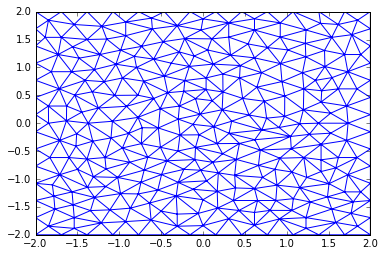

In [24]:
#Plot triangulated mesh for visualization
pt.triplot(mesh_pts[:, 0], mesh_pts[:, 1], elems)

In [30]:
# Function to integrate over 
def f(x, y):
    #return x**2 + y**2 - 2
    #return (x**4)*y + y**2
    #return -x*np.log(y)
    return (abs(x-y))*(1 / (1 + np.exp(- 1 * (y - 1.5) )))

### Gaussian Quadrature

In [31]:
S = 0
Gp = 3
# Iterate through each element
for i, elem in enumerate(elems):
    # Get vertices of the element
    v1,v2,v3 = mesh_pts[elem] 
    # Compute the integral of each element.
    S += gaussInt(f, Gp, v1,v2,v3)
print("GQ(f) = "+str(S))

GQ(f) = 5.24951766251


### Composite Trapezoidal

In [32]:
S = 0
# Iterate through each element
for i, elem in enumerate(elems):
    # Get vertices of the element
    v1, v2, v3 = mesh_pts[elem] 
    # Compute the integral of each element.
    S += trapezoidInt(f, v1, v2, v3)
print("TQ(f) = "+str(S))

TQ(f) = 5.27355210315
